In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [17]:
X_train[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

In [3]:
X_test.shape


(10000, 32, 32, 3)

In [6]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

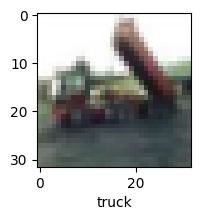

In [12]:
plot_sample(X_train,y_train, 2)

# NORMALISE DATA

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [18]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [19]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 57s 36ms/step - loss: 1.8096 - accuracy: 0.3556
Epoch 2/5
1563/1563 [==============================] - 57s 36ms/step - loss: 1.6217 - accuracy: 0.4270
Epoch 3/5
1360/1563 [=========================>....] - ETA: 7s - loss: 1.5401 - accuracy: 0.4573

KeyboardInterrupt: 

In [23]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

313/313 [==============================] - 2s 8ms/step


In [24]:
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.46      0.51      1000
           1       0.61      0.49      0.54      1000
           2       0.42      0.23      0.30      1000
           3       0.33      0.40      0.36      1000
           4       0.48      0.29      0.36      1000
           5       0.47      0.26      0.33      1000
           6       0.52      0.51      0.51      1000
           7       0.44      0.61      0.51      1000
           8       0.58      0.60      0.59      1000
           9       0.36      0.74      0.49      1000

    accuracy                           0.46     10000
   macro avg       0.48      0.46      0.45     10000
weighted avg       0.48      0.46      0.45     10000



# CNN

In [25]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [26]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 18s 11ms/step - loss: 1.4822 - accuracy: 0.4670
Epoch 2/5
1563/1563 [==============================] - 21s 14ms/step - loss: 1.1209 - accuracy: 0.6077
Epoch 3/5
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9892 - accuracy: 0.6561
Epoch 4/5
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9016 - accuracy: 0.6875
Epoch 5/5
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8343 - accuracy: 0.7123


In [28]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.9049 - accuracy: 0.6929


[0.9049118161201477, 0.6929000020027161]

In [29]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 4ms/step


array([[8.8261878e-03, 1.2231064e-04, 5.3159958e-03, 8.1190705e-01,
        2.1420184e-03, 8.5374296e-02, 2.7934084e-02, 5.2262669e-05,
        5.5157099e-02, 3.1687275e-03],
       [1.0664993e-02, 4.8060161e-03, 2.8170446e-06, 1.5981865e-07,
        6.0554548e-06, 1.6779634e-08, 3.7171954e-09, 1.3819067e-08,
        9.8449743e-01, 2.2565851e-05],
       [1.4529561e-01, 1.6445750e-01, 3.5825612e-03, 2.3070842e-03,
        4.9670418e-03, 9.2017651e-04, 2.2666951e-04, 7.7289098e-04,
        6.6668117e-01, 1.0789338e-02],
       [9.3582356e-01, 1.1085583e-02, 4.1547474e-03, 5.6444103e-04,
        4.7207414e-03, 2.2889160e-05, 3.2697717e-05, 2.8250017e-04,
        4.3250348e-02, 6.2476531e-05],
       [1.9544441e-06, 2.2863576e-05, 1.6721848e-02, 2.9743567e-02,
        5.8399451e-01, 6.5197707e-03, 3.6295450e-01, 1.1212254e-05,
        2.4644658e-05, 5.0631179e-06]], dtype=float32)

In [31]:
y_classes= [np.argmax(element) for element in y_pred]

In [34]:
y_classes[:5]

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [42]:
y_test = y_test.reshape(-1,)

In [43]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

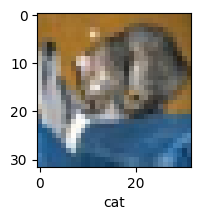

In [46]:
plot_sample(X_test, y_test,0)

In [47]:
classes[y_classes[0]]


'cat'